# Task 2.3 Complex Machine Learning Models and Keras (Random Forest)

### Table of Contents:

#### 01. Importing Libraries and Data
#### 02. Preprocessing: Cleaning, Wrangling, Reshaping and Splitting the Data
#### 03. Creating Random Forests
         2010s Data
#### 04. Uncovering Feature Importances
         2010s Data
#### 05. Modeling the 3 Most Influential Weather Stations and Uncovering their Feature Importances
         Basel
         Madrid
         Budapest
            

## 01. Importing Libraries and Data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from numpy import argmax

In [2]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [3]:
# Set option to display max number of columns

pd.set_option('display.max_columns', None)

In [4]:
### Import Data
# Define a path for easier importing 
path = r'C:\Users\DELL\Documents\Climatewins\Data'

In [5]:
# Import climate_cleaned data

climate = pd.read_csv(os.path.join(path, 'Dataset.csv'), index_col = False)

In [6]:
### Import the  weather data
weather = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [7]:
climate.shape

(22950, 170)

In [8]:
climate.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   
2  19600103      1                  8               2.1            0.90   
3  19600104      1                  3               2.1            0.92   
4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0             0.7              6.5             0.8   
1                 0             1.1              6.1             3.3   
2                 0             0.0              8.5             5.1   
3                 0             4.1              6.3             3.8   
4                 0             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0            10.9                     1               0.81             1.0195   
1            10.1                     6               0.84             1.0172   
2             9.9                     6               0.77             1.0179   
3            10.6                     8               0.93             1.0268   
4             6.0                     8               0.99             1.0286   

   BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                       0.88                    0.00                7.0   
1                       0.25                    0.00                0.0   
2                       0.67                    0.00                3.5   
3                       0.25                    0.00                0.0   
4                       0.25                    0.06                0.0   

   BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
0                 3.7               -0.9                7.9   
1                 2.9                2.2                4.4   
2                 3.1               -0.5                6.4   
3                 2.0               -2.0                3.0   
4                 2.0                0.7                2.8   

   BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   
1                     4               0.67              1.017   
2                     4               0.67              1.017   
3                     4               0.67              1.017   
4                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   
1                       0.18                    0.31                0.0   
2                       0.30                    0.00                0.6   
3                       0.19                    0.00                0.0   
4                       0.19                    0.00                0.0   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
0                 2.4               -0.4                5.1   
1                 2.3                1.4                3.1   
2                 2.7                1.7                5.3   
3                 2.0                0.4                4.4   
4                 2.5                1.1                5.3   

   DEBILT_cloud_cover  DEBILT_wind_speed  DEBILT_humidity  DEBILT_pressure  \
0                   7                7.7             0.85           1.0032   
1                   8           

In [9]:
weather.shape

(22950, 16)

## 2. Data Wrangling
- Reduce data to one decade. Chosen decade: 2010s (2010-2019).

In [10]:
# Reduce climate dataset to 2010's

climate_decade = climate[(climate['DATE'].astype(str).str[:4] >= '2010') & (climate['DATE'].astype(str).str[:4] <= '2019')]
climate_decade

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
18263  20100101      1                  8               2.3            0.93   
18264  20100102      1                  3               3.0            0.74   
18265  20100103      1                  3               1.7            0.75   
18266  20100104      1                  5               1.0            0.83   
18267  20100105      1                  7               1.4            0.78   
...         ...    ...                ...               ...             ...   
21910  20191227     12                  8               1.5            0.92   
21911  20191228     12                  7               1.9            0.86   
21912  20191229     12                  6               1.1            0.93   
21913  20191230     12                  1               1.8            0.81   
21914  20191231     12                  5               2.9            0.87   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
18263          0.9965                    0.18                 0.56   
18264          1.0193                    0.58                 0.00   
18265          1.0226                    0.61                 0.00   
18266          1.0169                    0.48                 0.00   
18267          1.0073                    0.53                 0.04   
...               ...                     ...                  ...   
21910          1.0273                    0.15                 0.52   
21911          1.0380                    0.35                 0.00   
21912          1.0387                    0.61                 0.00   
21913          1.0354                    0.64                 0.00   
21914          1.0350                    0.58                 0.00   

       BASEL_snow_depth  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
18263                 0             0.0              2.9            -0.2   
18264                 1             5.2             -1.5            -4.2   
18265                 0             6.3             -3.2            -6.0   
18266                 0             3.7             -4.9            -8.3   
18267                 0             4.4             -4.0            -7.1   
...                 ...             ...              ...             ...   
21910                 0             0.1              6.8             5.6   
21911                 0             1.3              3.7            -0.6   
21912                 0             4.9             -0.8            -2.7   
21913                 0             6.5              0.5            -3.0   
21914                 0             3.5              0.4            -1.3   

       BASEL_temp_max  BELGRADE_cloud_cover  BELGRADE_humidity  \
18263             4.8                     6               0.85   
18264             0.4                     8               0.92   
18265             1.1                     7               0.82   
18266            -3.1                     2               0.72   
18267            -1.5                     6               0.81   
...               ...                   ...                ...   
21910             7.9                     5               0.68   
21911             5.7                     8               0.68   
21912             2.6                     8               0.68   
21913             5.1                     6               0.68   
21914             3.5                     2               0.68   

       BELGRADE_pressure  BELGRADE_global_radiation  BELGRADE_precipitation  \
18263             0.9912                       0.64                    2.63   
18264             0.9995                       0.25                    0.74   
18265             1.0156                       0.25                    0.12   
18266             1.0211                       0.86                    0.00   
18267             1.0111                       0.39                    1.20   
...                  ...                 

In [11]:
# Reduce weather dataset to 2010's

weather_decade = weather[(weather['DATE'].astype(str).str[:4] >= '2010') & (weather['DATE'].astype(str).str[:4] <= '2019')]
weather_decade

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  20100101                       0                          0   
18264  20100102                       0                          0   
18265  20100103                       0                          0   
18266  20100104                       0                          0   
18267  20100105                       0                          0   
...         ...                     ...                        ...   
21910  20191227                       0                          0   
21911  20191228                       0                          0   
21912  20191229                       0                          0   
21913  20191230                       0                          0   
21914  20191231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   
...                          ...                      ...   
21910                          0                        0   
21911                          0                        0   
21912                          0                        0   
21913                          0                        0   
21914                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   
...                            ...                        ...   
21910                            0                          0   
21911                            0                          0   
21912                            0                          0   
21913                            0                          0   
21914                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   
...                        ...                         ...   
21910                        0                           0   
21911                        0                           0   
21912                        0                           0   
21913                        0                           0   
21914                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   
...                            ...                      ...   
21910                            0                        0   
21911                            0                        0   
21912                            0                        0   
21913                            0                        0   
21914                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264                          0    

In [12]:
# Set display options to show all rows

pd.set_option('display.max_rows', None)

In [13]:
# Extract stations list

stations = [col.split('_')[0] for col in climate_decade.columns if '_' in col]

In [14]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'GDANSK',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'ROMA',
 'SONNBLICK',
 'STOCKHOLM',
 'TOURS',
 'VALENTIA'}

In [15]:
# Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in  climate_decade.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  climate_decade[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
GDANSK: 25564 entries
MUNCHENB: 32868 entries
VALENTIA: 36520 entries
DEBILT: 36520 entries
OSLO: 40172 entries
STOCKHOLM: 29216 entries
HEATHROW: 36520 entries
KASSEL: 32868 entries
LJUBLJANA: 36520 entries
ROMA: 21912 entries
TOURS: 29216 entries
DUSSELDORF: 40172 entries
MADRID: 36520 entries
BELGRADE: 32868 entries
BUDAPEST: 32868 entries
SONNBLICK: 36520 entries
BASEL: 40172 entries
MAASTRICHT: 36520 entries


In [16]:
# Drop columns that end with wind_speed and snow_depth from the dataset

columns_to_drop = climate_decade.filter(regex='(_wind_speed|_snow_depth)$').columns
columns_to_drop

Index(['BASEL_wind_speed', 'BASEL_snow_depth', 'DEBILT_wind_speed',
       'DUSSELDORF_wind_speed', 'DUSSELDORF_snow_depth', 'GDANSK_snow_depth',
       'HEATHROW_snow_depth', 'KASSEL_wind_speed', 'LJUBLJANA_wind_speed',
       'MAASTRICHT_wind_speed', 'MADRID_wind_speed', 'MUNCHENB_snow_depth',
       'OSLO_wind_speed', 'OSLO_snow_depth', 'ROMA_wind_speed',
       'SONNBLICK_wind_speed', 'TOURS_wind_speed', 'VALENTIA_snow_depth'],
      dtype='object')

In [17]:
climate_decade = climate_decade.drop(columns=columns_to_drop)

In [18]:
# Drop unnecessary columns

climate_decade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [19]:
climate_decade.shape

(3652, 150)

In [20]:
weather_decade.drop(columns = 'DATE', inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4744\776273605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_decade.drop(columns = 'DATE', inplace = True)


In [21]:
weather_decade.shape

(3652, 15)

In [22]:
X = climate_decade

In [23]:
y = weather_decade

In [24]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [25]:
X.shape

(3652, 150)

In [26]:
y.shape

(3652, 15)

## 3. Data Split 

In [27]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [28]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 150) (2739, 15)
(913, 150) (913, 15)


## 4. Random Forest Model

In [29]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5848849945235487


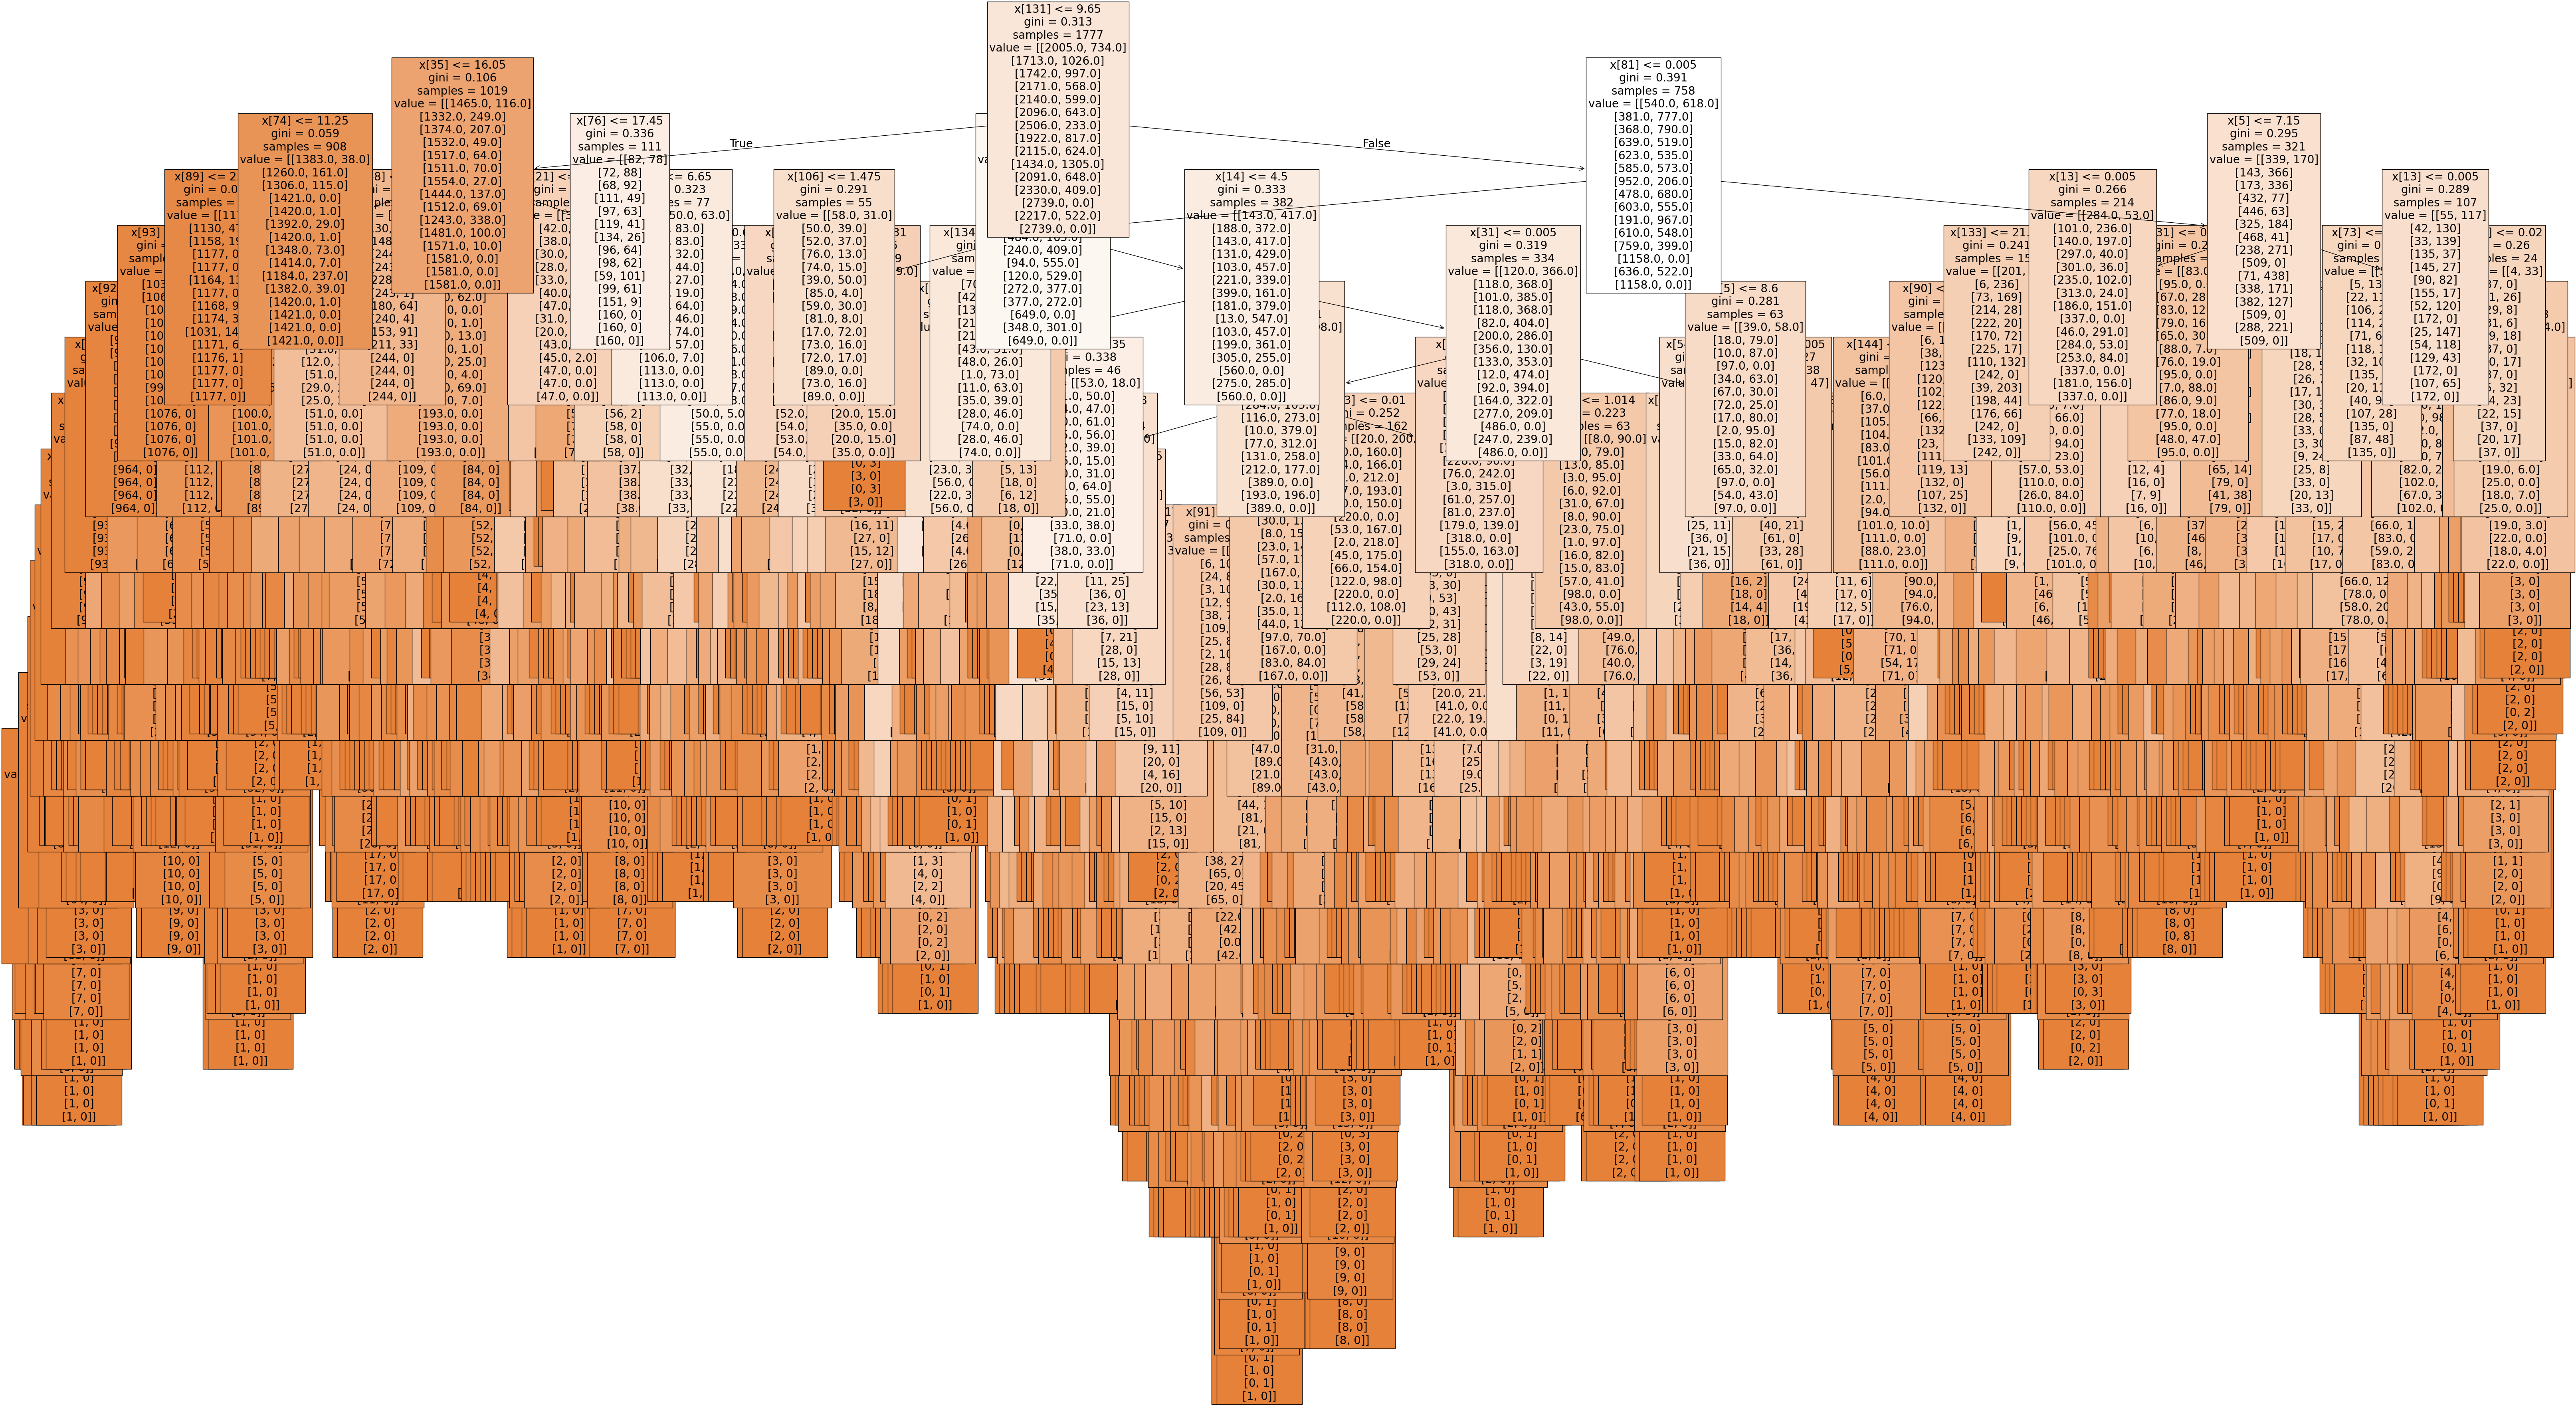

In [31]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

In [32]:
fig.savefig(os.path.join(path,'random_forest_2010s.png'),bbox_inches='tight')

In [33]:
## 5. Uncovering Feature Importances

In [34]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(150,)


array([3.80502953e-03, 3.54402642e-03, 3.31013623e-03, 3.17000626e-03,
       1.76674156e-02, 8.94211812e-03, 2.23352117e-02, 3.08957861e-03,
       2.25318732e-02, 3.80311086e-03, 3.43666899e-03, 3.83878436e-03,
       2.70761227e-03, 1.76615946e-02, 3.19667734e-03, 1.03275600e-02,
       3.48252142e-03, 5.74234436e-03, 2.99092745e-04, 0.00000000e+00,
       0.00000000e+00, 1.40457610e-03, 1.42646468e-02, 1.20201912e-03,
       1.58307146e-02, 5.88230441e-03, 1.98224242e-02, 2.44851474e-03,
       3.12483143e-03, 4.19882448e-03, 3.98194370e-03, 1.34739046e-02,
       5.23074756e-03, 1.55142785e-02, 2.81413632e-03, 2.89667060e-02,
       3.15487611e-03, 3.47227660e-03, 4.27961459e-03, 5.00223399e-03,
       1.82959299e-02, 6.63636580e-03, 1.63823106e-02, 2.83823719e-03,
       3.88076458e-02, 1.85865800e-03, 1.81916510e-03, 9.93933545e-04,
       2.10419100e-02, 8.23751898e-03, 6.83774506e-03, 2.62952715e-03,
       3.89830737e-03, 4.19783360e-03, 3.96729852e-03, 1.02026705e-02,
      

In [35]:
# Reshape newarray

newarray = newarray.reshape(-1,15,10)
print(newarray.shape)
newarray

(1, 15, 10)


array([[[3.80502953e-03, 3.54402642e-03, 3.31013623e-03, 3.17000626e-03,
         1.76674156e-02, 8.94211812e-03, 2.23352117e-02, 3.08957861e-03,
         2.25318732e-02, 3.80311086e-03],
        [3.43666899e-03, 3.83878436e-03, 2.70761227e-03, 1.76615946e-02,
         3.19667734e-03, 1.03275600e-02, 3.48252142e-03, 5.74234436e-03,
         2.99092745e-04, 0.00000000e+00],
        [0.00000000e+00, 1.40457610e-03, 1.42646468e-02, 1.20201912e-03,
         1.58307146e-02, 5.88230441e-03, 1.98224242e-02, 2.44851474e-03,
         3.12483143e-03, 4.19882448e-03],
        [3.98194370e-03, 1.34739046e-02, 5.23074756e-03, 1.55142785e-02,
         2.81413632e-03, 2.89667060e-02, 3.15487611e-03, 3.47227660e-03,
         4.27961459e-03, 5.00223399e-03],
        [1.82959299e-02, 6.63636580e-03, 1.63823106e-02, 2.83823719e-03,
         3.88076458e-02, 1.85865800e-03, 1.81916510e-03, 9.93933545e-04,
         2.10419100e-02, 8.23751898e-03],
        [6.83774506e-03, 2.62952715e-03, 3.89830737e-03, 4.1

In [36]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.09219851, 0.05069286, 0.06817886, 0.08589072, 0.11691167,
       0.06961719, 0.03403889, 0.08004524, 0.1112711 , 0.07987485,
       0.07272023, 0.0215221 , 0.03972514, 0.05213583, 0.0251768 ])

In [37]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [38]:
# Convert the set of unique stations to a list

unique_stations_list = unique_stations_list[:len(sumarray)]

In [39]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

OSLO          0.116912
LJUBLJANA     0.111271
GDANSK        0.092199
DEBILT        0.085891
KASSEL        0.080045
ROMA          0.079875
TOURS         0.072720
STOCKHOLM     0.069617
VALENTIA      0.068179
BELGRADE      0.052136
MUNCHENB      0.050693
MADRID        0.039725
HEATHROW      0.034039
BUDAPEST      0.025177
DUSSELDORF    0.021522
dtype: float64

In [40]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['GDANSK', 'MUNCHENB', 'VALENTIA', 'DEBILT', 'OSLO', 'STOCKHOLM', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'ROMA', 'TOURS', 'DUSSELDORF', 'MADRID', 'BELGRADE', 'BUDAPEST']


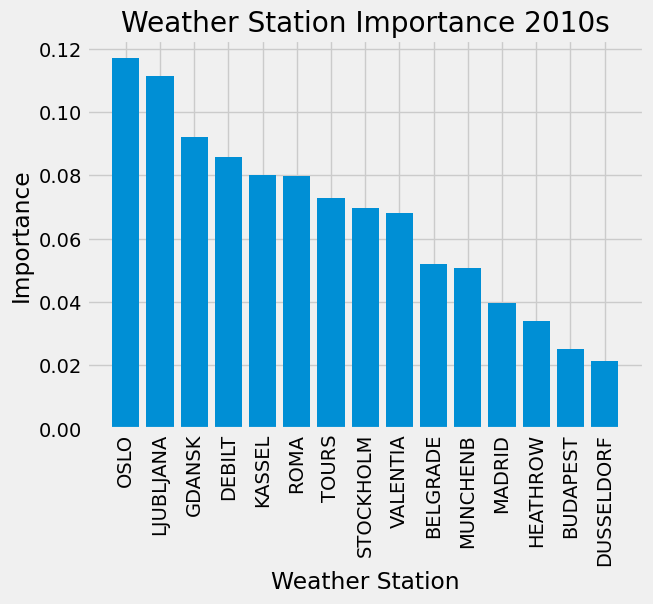

In [41]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s')

plt.savefig(os.path.join(path, '2010s_feauture_importances.png'), bbox_inches='tight')

plt.show()

In [42]:
## 05. Modeling the 3 Most Influential Weather Stations and Uncovering their Feature Importance

In [43]:
# Filter weather dataset to only include Basel
df_bas = climate_decade[climate_decade.columns[climate_decade.columns.astype(str).str.startswith('BASEL')]]

In [44]:
# Check output
df_bas.head(1)

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263                  8            0.93          0.9965   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  
18263              2.9            -0.2             4.8

In [45]:
# Filter pleasant dataset to only include Basel
bas_pleasant = weather_decade[weather_decade.columns[weather_decade.columns.astype(str).str.startswith('BASEL')]]

# Check output
bas_pleasant.head(1)

BASEL_pleasant_weather
18263                       0

In [46]:
# Create matrices
y_3 = bas_pleasant.max(axis=1)

# Check shape
print("Shape of y_3_combined:", y_3.shape)

Shape of y_3_combined: (3652,)


In [47]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_3_combined:", y_3.unique())

Unique values in y_3_combined: [0 1]


In [48]:
# Ensure y has the correct shape
y_3 = y_3.to_numpy().reshape(-1)

# Check shape
print(y_3.shape)

(3652,)


In [49]:
# Create X matrix
X_3 = df_bas.to_numpy()

# Check shapes of the matrices
print(X_3.shape)
print(y_3.shape)

(3652, 9)
(3652,)


In [50]:
# Split data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=127)

# Check shapes
print(X_train_3.shape, y_train_3.shape)
print(X_test_3.shape, y_test_3.shape)

(2739, 9) (2739,)
(913, 9) (913,)


**Creating Random Forest for Basel**

In [51]:
# Creating a Random Forest classifier
clf_3 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_3.fit(X_train_3, y_train_3)

RandomForestClassifier(max_depth=3)

In [52]:
# Perform the predictions on the test dataset
y_pred_3 = clf_3.predict(X_test_3)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_3, y_pred_3))

Model Accuracy:  0.9978094194961665


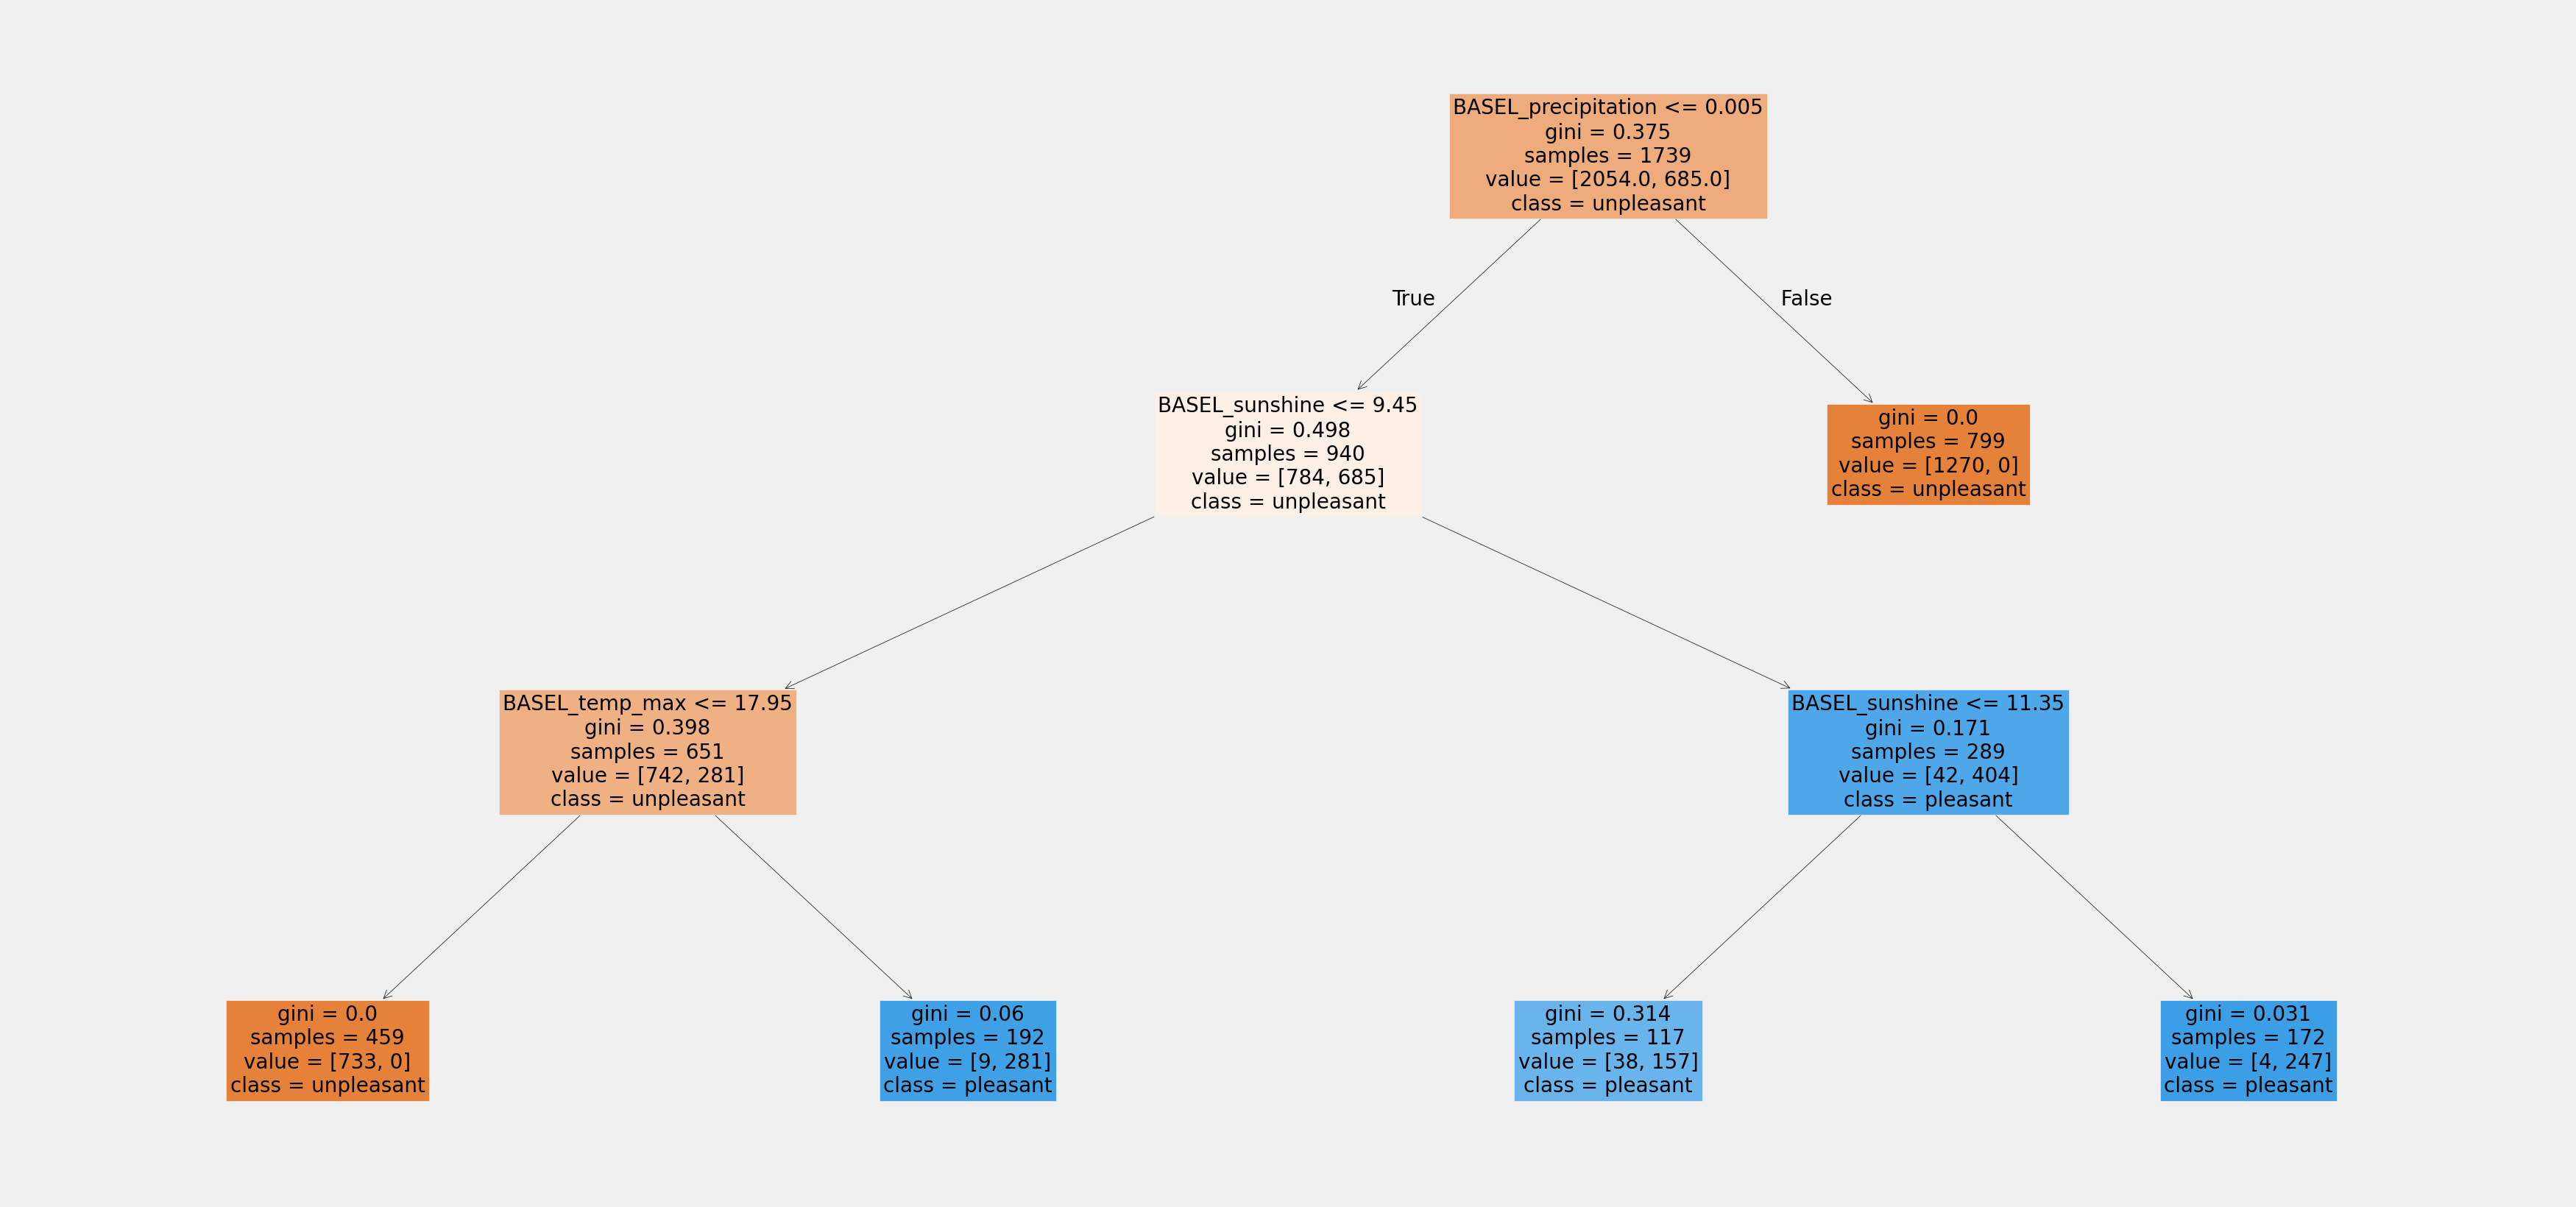

In [53]:
# Plot random forest (Basel)
rf_3 = plt.figure(figsize=(40,20))
plot_tree(clf_3.estimators_[5], fontsize = 20, feature_names=df_bas.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [54]:
# Export the plot
rf_3.savefig(os.path.join(path, 'random_forest_basel.png'),bbox_inches='tight')

**Listing Feature Importances**

In [55]:
# Retrieve feature importances from the trained model
feature_importances_3 = clf_3.feature_importances_
print("Feature Importances:", feature_importances_3)
print(feature_importances_3.shape)

Feature Importances: [0.04399658 0.01779161 0.00788282 0.06383064 0.24472143 0.1984199
 0.09524267 0.02629002 0.30182431]
(9,)


In [56]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [57]:
# Create a dataframe to associate observation measurements with their importances
importances_df_3 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_3
})

In [58]:
# Sort by importance for chart readability
importances_df_3 = importances_df_3.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_3)

Feature Importance:
        Measurement  Importance
8          temp_max    0.301824
4     precipitation    0.244721
5          sunshine    0.198420
6         temp_mean    0.095243
3  global_radiation    0.063831
0       cloud_cover    0.043997
7          temp_min    0.026290
1          humidity    0.017792
2          pressure    0.007883


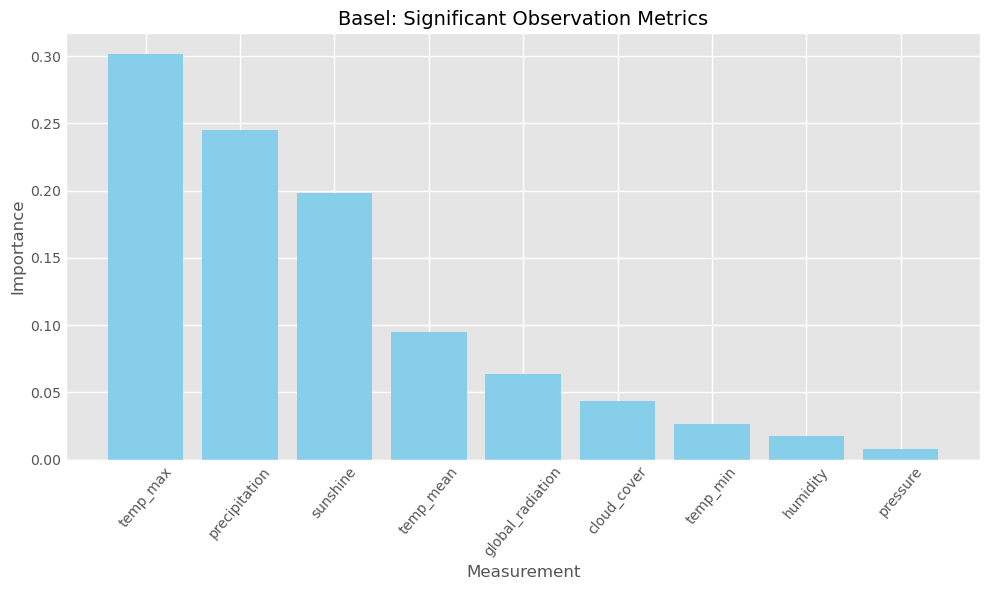

In [59]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_3['Measurement'], importances_df_3['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Basel: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(path, 'Basel_feauture_importances.png'), bbox_inches='tight')
plt.show()

In [60]:
# Filter weather dataset to only include Madrid
df_mad = climate_decade[climate_decade.columns[climate_decade.columns.astype(str).str.startswith('MADRID')]]

In [61]:
# Check output
df_mad.head(1)

MADRID_cloud_cover  MADRID_humidity  MADRID_pressure  \
18263                   5             0.82           1.0107   

       MADRID_global_radiation  MADRID_precipitation  MADRID_sunshine  \
18263                     0.46                  0.01              2.8   

       MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
18263               5.6              3.6              7.6

In [62]:
# Filter pleasant dataset to only include Basel
mad_pleasant = weather_decade[weather_decade.columns[weather_decade.columns.astype(str).str.startswith('MADRID')]]

# Check output
mad_pleasant.head(1)

MADRID_pleasant_weather
18263                        0

In [63]:
# Create matrices
y_3 = mad_pleasant.max(axis=1)

# Check shape
print("Shape of y_3_combined:", y_3.shape)

Shape of y_3_combined: (3652,)


In [64]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_3_combined:", y_3.unique())

Unique values in y_3_combined: [0 1]


In [65]:
# Ensure y has the correct shape
y_3 = y_3.to_numpy().reshape(-1)

# Check shape
print(y_3.shape)

(3652,)


In [66]:
# Create X matrix
X_3 = df_bas.to_numpy()

# Check shapes of the matrices
print(X_3.shape)
print(y_3.shape)

(3652, 9)
(3652,)


In [67]:
# Split data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=127)

# Check shapes
print(X_train_3.shape, y_train_3.shape)
print(X_test_3.shape, y_test_3.shape)

(2739, 9) (2739,)
(913, 9) (913,)


**Creating Random Forest for Madrid**

In [68]:
# Creating a Random Forest classifier
clf_3 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_3.fit(X_train_3, y_train_3)

RandomForestClassifier(max_depth=3)

In [69]:
# Perform the predictions on the test dataset
y_pred_3 = clf_3.predict(X_test_3)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_3, y_pred_3))

Model Accuracy:  0.8214676889375685


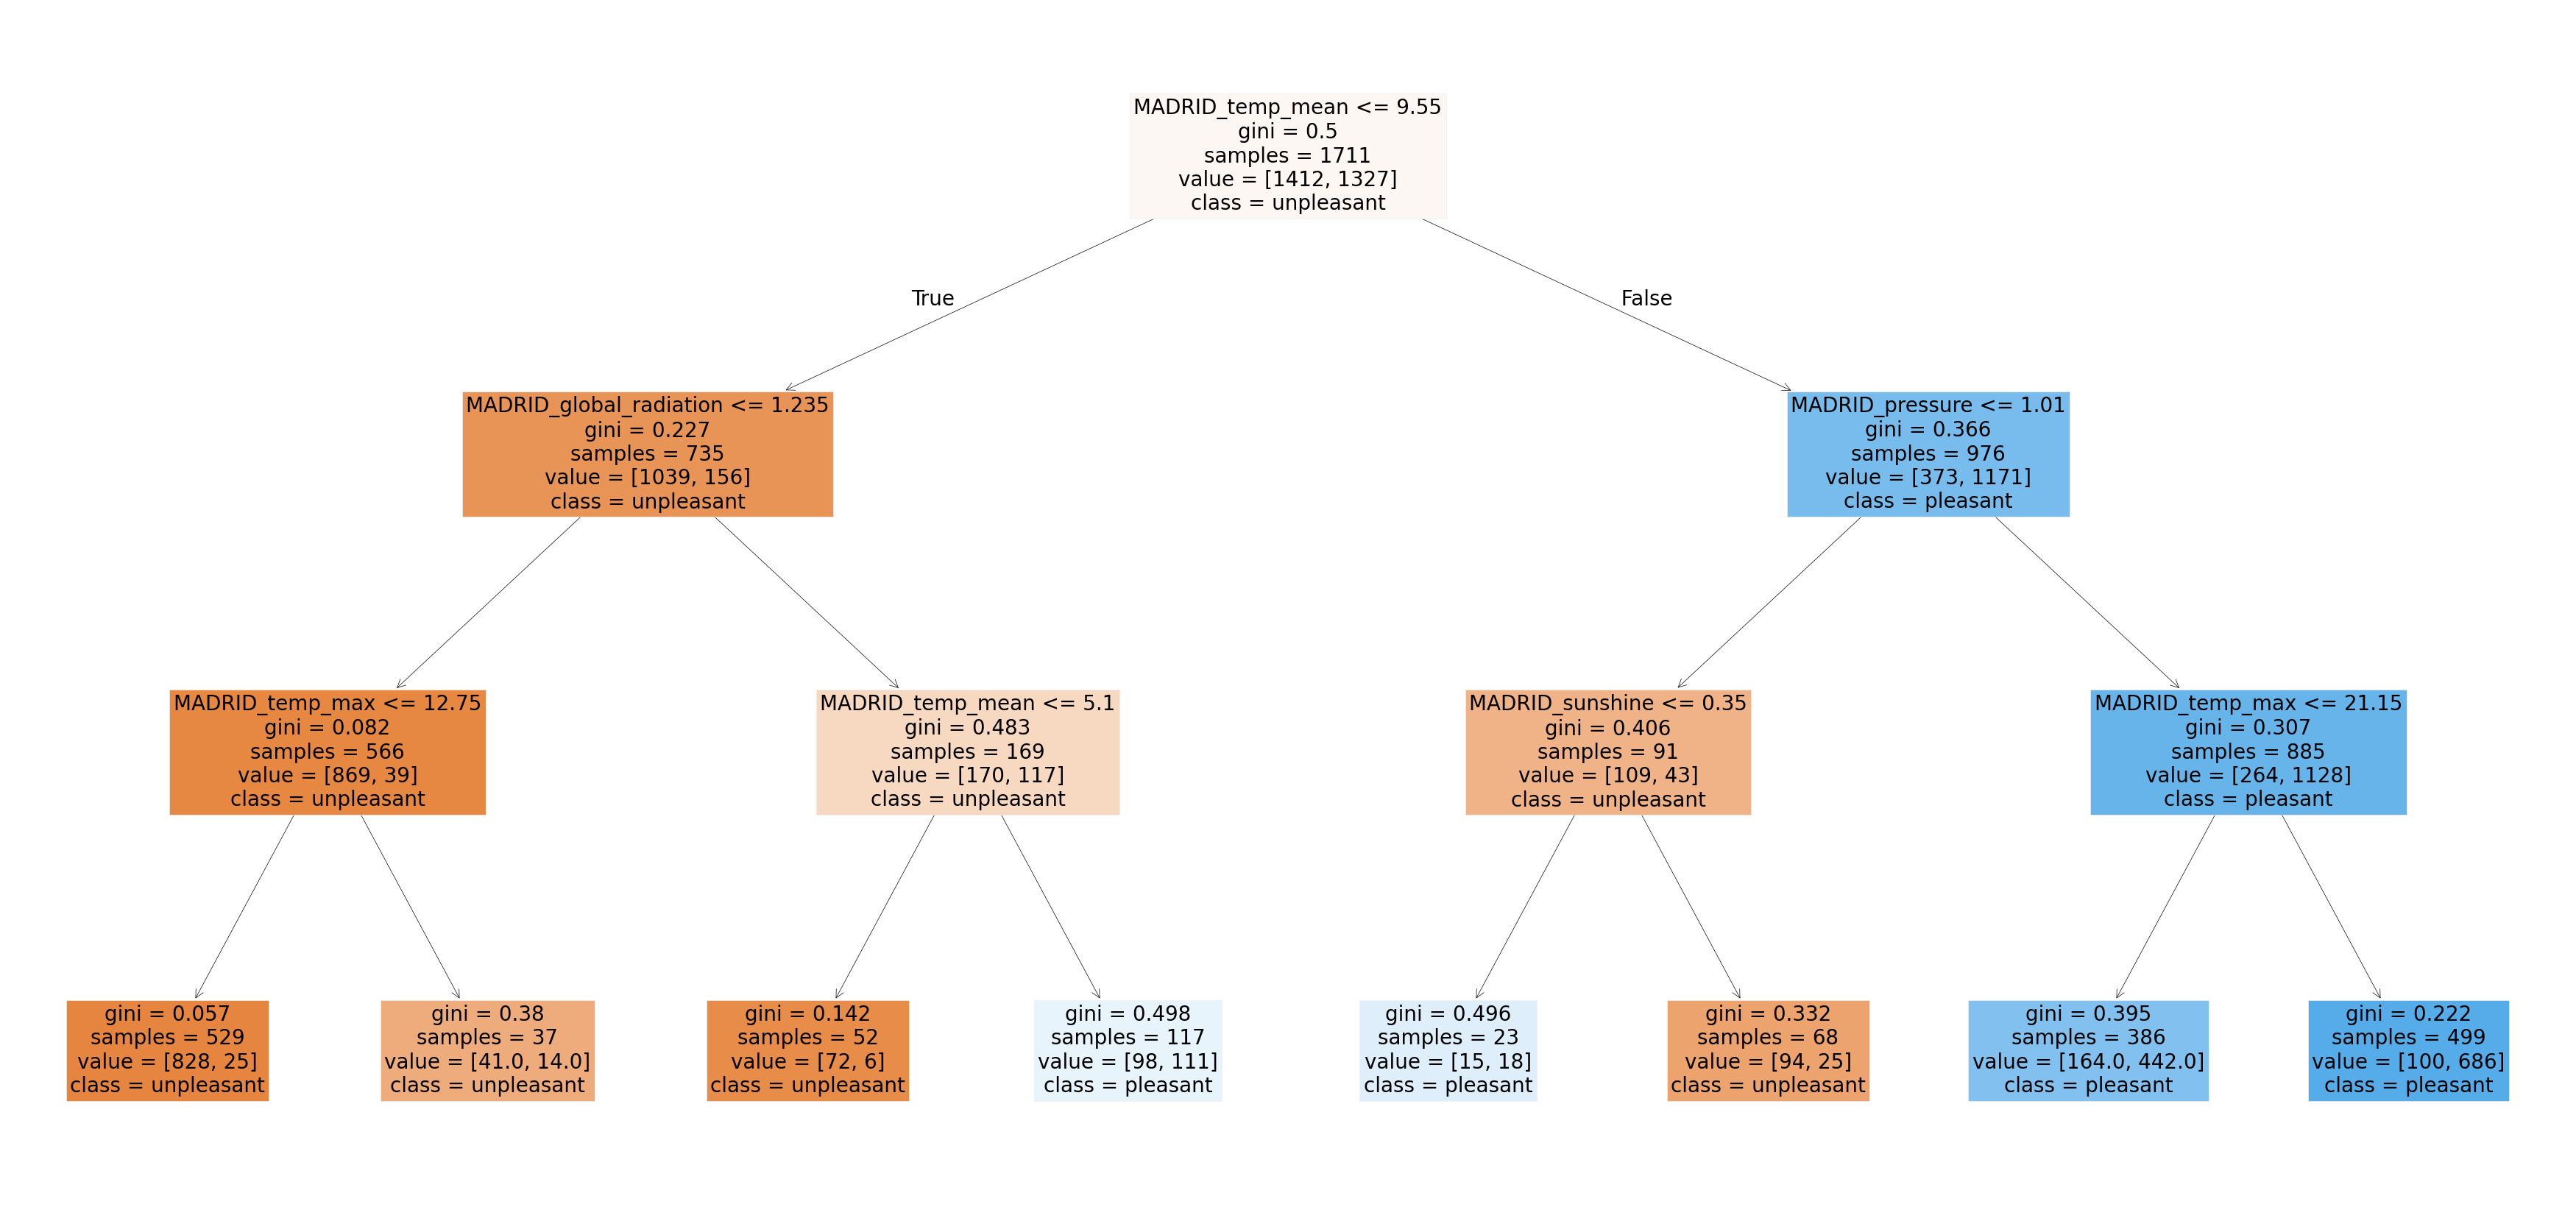

In [70]:
# Plot random forest (Madrid)
rf_3 = plt.figure(figsize=(40,20))
plot_tree(clf_3.estimators_[5], fontsize = 20, feature_names=df_mad.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [71]:
# Export the plot
rf_3.savefig(os.path.join(path, 'random_forest_madrid.png'),bbox_inches='tight')

**Listing Feature Importances**

In [72]:
# Retrieve feature importances from the trained model
feature_importances_3 = clf_3.feature_importances_
print("Feature Importances:", feature_importances_3)
print(feature_importances_3.shape)

Feature Importances: [8.50724268e-05 3.04667295e-03 5.24906602e-02 1.12450603e-01
 2.57897714e-03 2.94554995e-02 3.25120515e-01 2.08979830e-01
 2.65792170e-01]
(9,)


In [73]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [74]:
# Create a dataframe to associate observation measurements with their importances
importances_df_3 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_3
})

In [75]:
# Sort by importance for chart readability
importances_df_3 = importances_df_3.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_3)

Feature Importance:
        Measurement  Importance
6         temp_mean    0.325121
8          temp_max    0.265792
7          temp_min    0.208980
3  global_radiation    0.112451
2          pressure    0.052491
5          sunshine    0.029455
1          humidity    0.003047
4     precipitation    0.002579
0       cloud_cover    0.000085


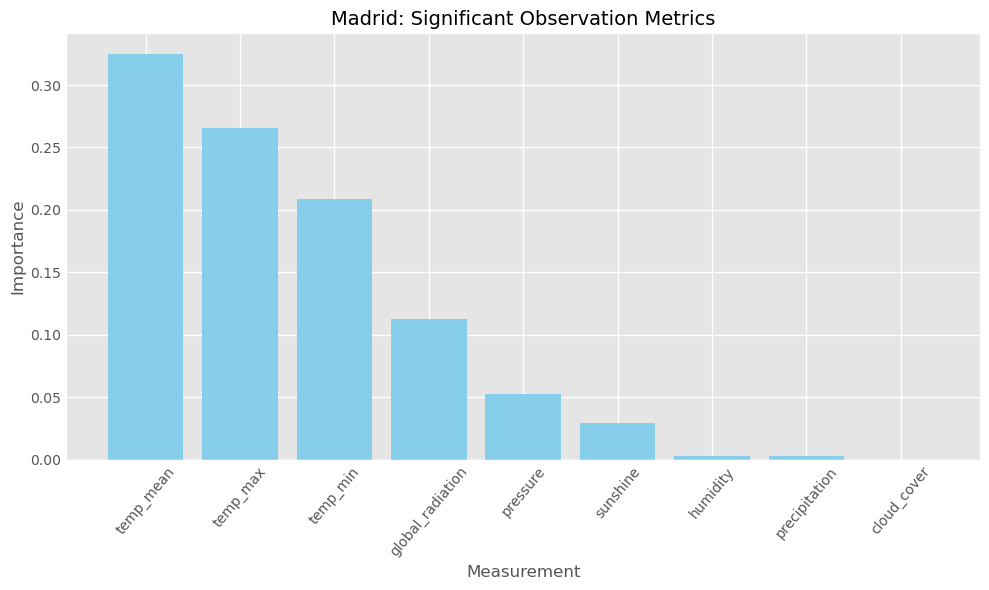

In [76]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_3['Measurement'], importances_df_3['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Madrid: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(path, 'Madrid_feauture_importances.png'), bbox_inches='tight')
plt.show()

In [77]:
# Filter weather dataset to only include Budapest
df_bud= climate_decade[climate_decade.columns[climate_decade.columns.astype(str).str.startswith('BUDAPEST')]]

In [78]:
# Check output
df_bud.head(1)

BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
18263                     6               0.67              1.017   

       BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
18263                       0.31                     0.0                0.7   

       BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  
18263                 5.0                3.6                7.8

In [79]:
# Filter pleasant dataset to only include budapest
bud_pleasant = weather_decade[weather_decade.columns[weather_decade.columns.astype(str).str.startswith('BUDAPEST')]]

# Check output
bud_pleasant.head(1)

BUDAPEST_pleasant_weather
18263                          0

In [80]:
# Create matrices
y_3 = bud_pleasant.max(axis=1)

# Check shape
print("Shape of y_3_combined:", y_3.shape)

Shape of y_3_combined: (3652,)


In [81]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_3_combined:", y_3.unique())

Unique values in y_3_combined: [0 1]


In [82]:
# Ensure y has the correct shape
y_3 = y_3.to_numpy().reshape(-1)

# Check shape
print(y_3.shape)

(3652,)


In [83]:
# Create X matrix
X_3 = df_bas.to_numpy()

# Check shapes of the matrices
print(X_3.shape)
print(y_3.shape)

(3652, 9)
(3652,)


In [84]:
# Split data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=127)

# Check shapes
print(X_train_3.shape, y_train_3.shape)
print(X_test_3.shape, y_test_3.shape)

(2739, 9) (2739,)
(913, 9) (913,)


**Creating Random Forest for Budapest**

In [85]:
# Creating a Random Forest classifier
clf_3 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_3.fit(X_train_3, y_train_3)

RandomForestClassifier(max_depth=3)

In [86]:
# Perform the predictions on the test dataset
y_pred_3 = clf_3.predict(X_test_3)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_3, y_pred_3))

Model Accuracy:  0.8192771084337349


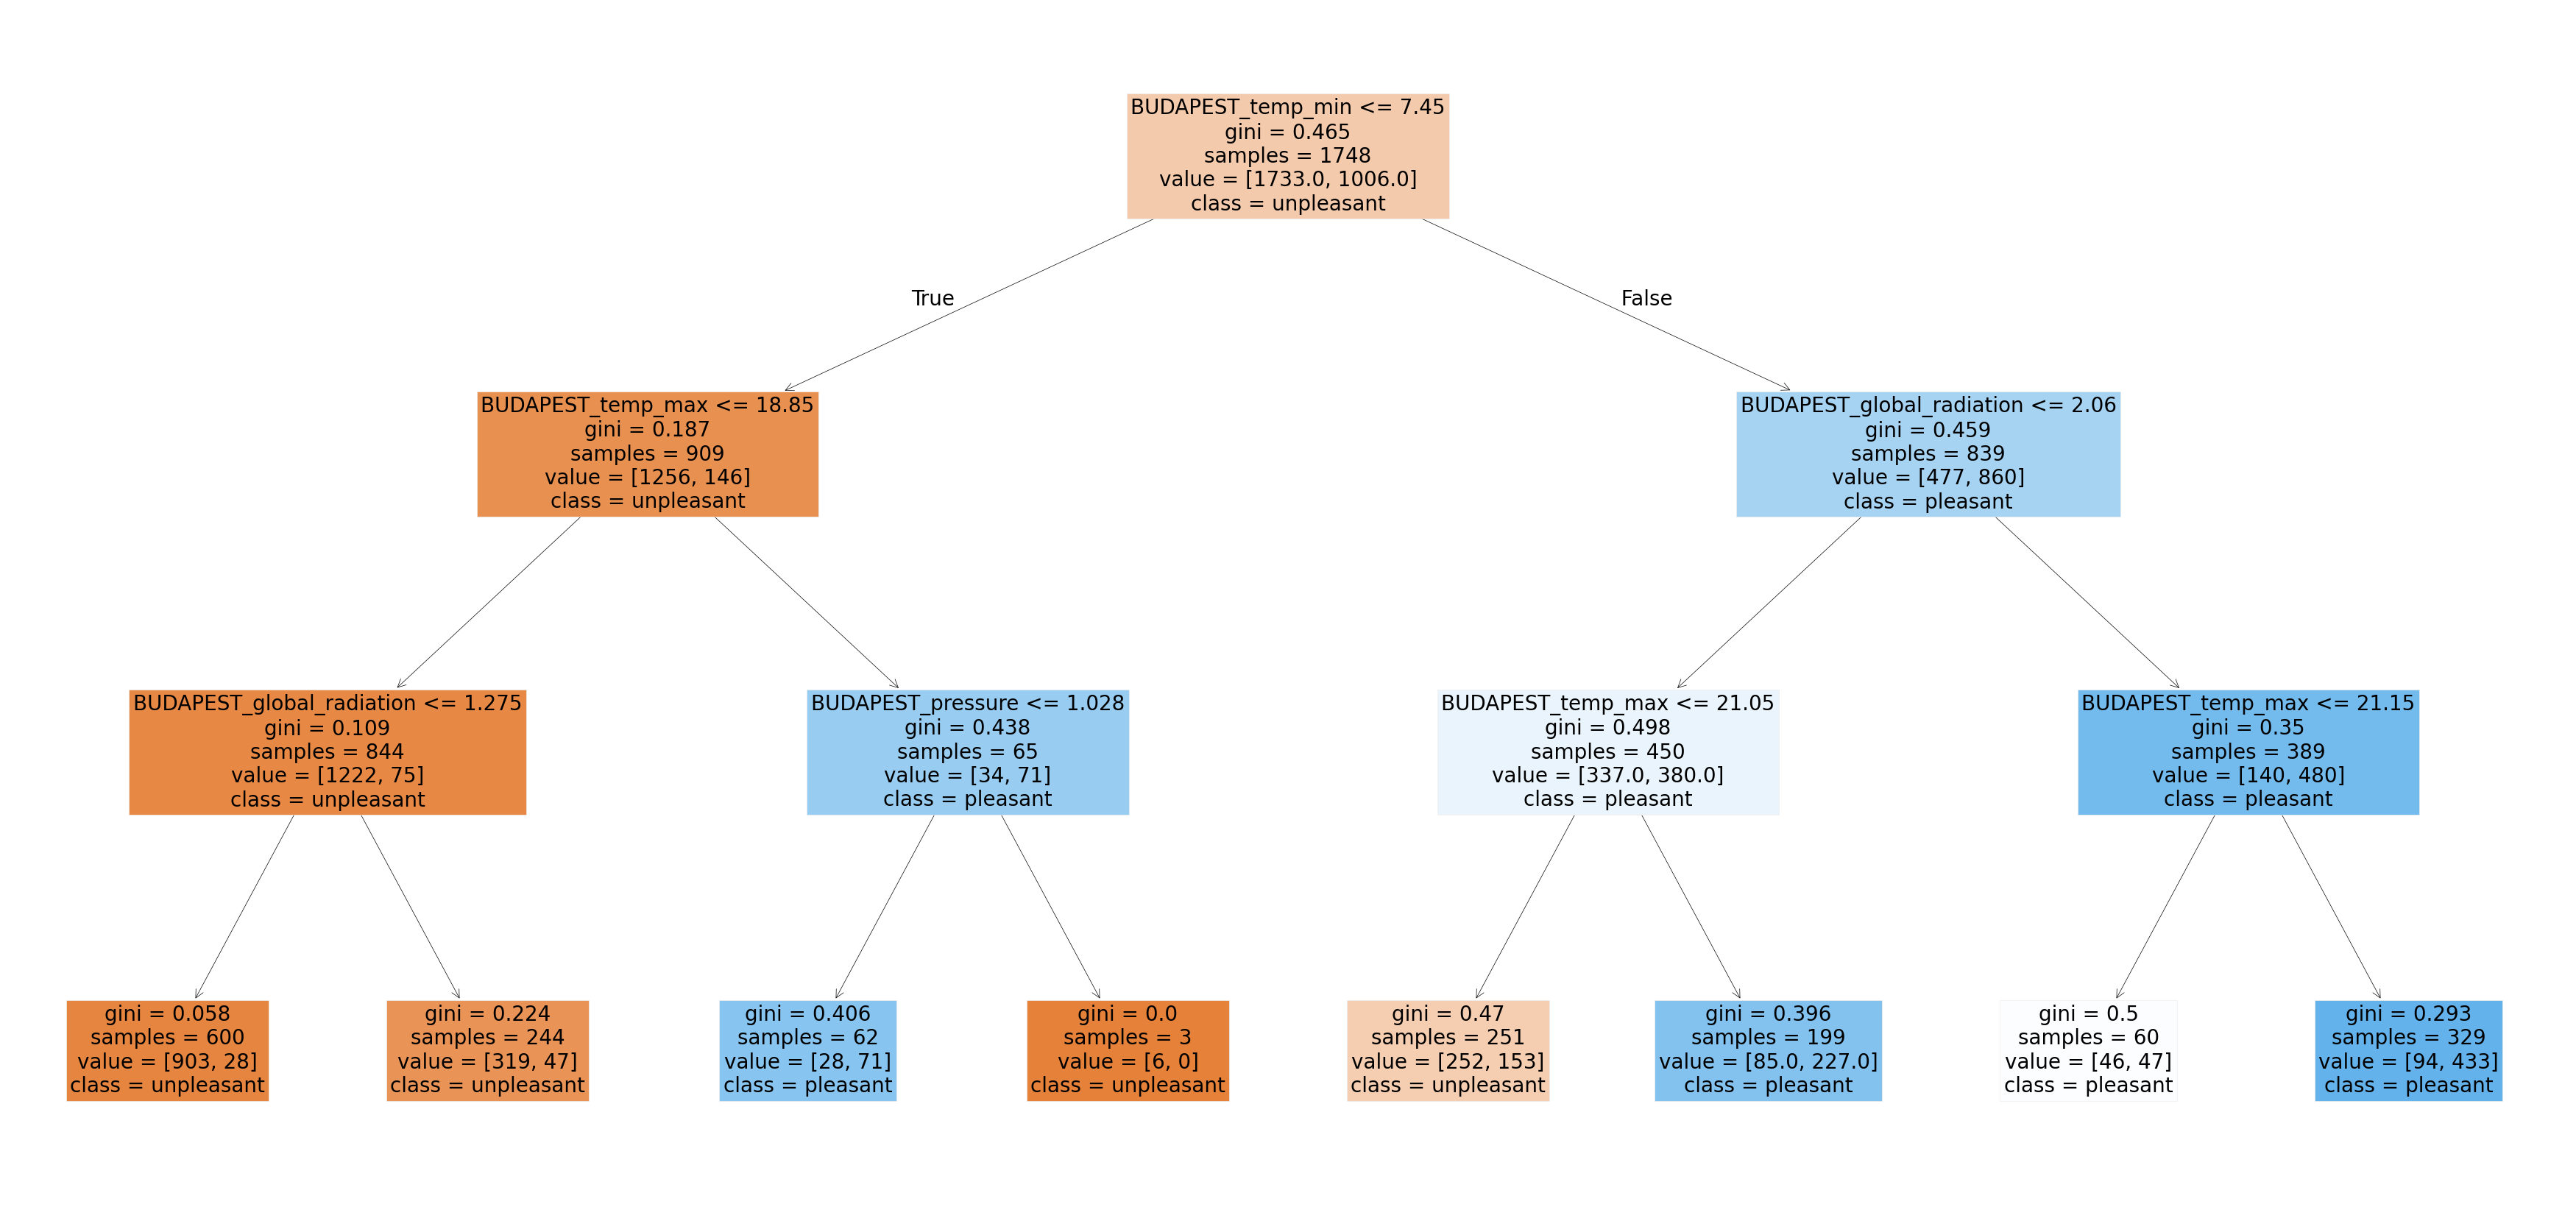

In [87]:
# Plot random forest (Budapest)
rf_3 = plt.figure(figsize=(40,20))
plot_tree(clf_3.estimators_[5], fontsize = 20, feature_names=df_bud.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [88]:
# Export the plot
rf_3.savefig(os.path.join(path, 'random_forest_budapest.png'),bbox_inches='tight')

**Listing Feature Importances**

In [89]:
# Retrieve feature importances from the trained model
feature_importances_3 = clf_3.feature_importances_
print("Feature Importances:", feature_importances_3)
print(feature_importances_3.shape)

Feature Importances: [0.00417376 0.01126616 0.00661866 0.05342446 0.00271275 0.03504323
 0.34885436 0.15513924 0.3827674 ]
(9,)


In [90]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [91]:
# Create a dataframe to associate observation measurements with their importances
importances_df_3 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_3
})

In [92]:
# Sort by importance for chart readability
importances_df_3 = importances_df_3.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_3)

Feature Importance:
        Measurement  Importance
8          temp_max    0.382767
6         temp_mean    0.348854
7          temp_min    0.155139
3  global_radiation    0.053424
5          sunshine    0.035043
1          humidity    0.011266
2          pressure    0.006619
0       cloud_cover    0.004174
4     precipitation    0.002713


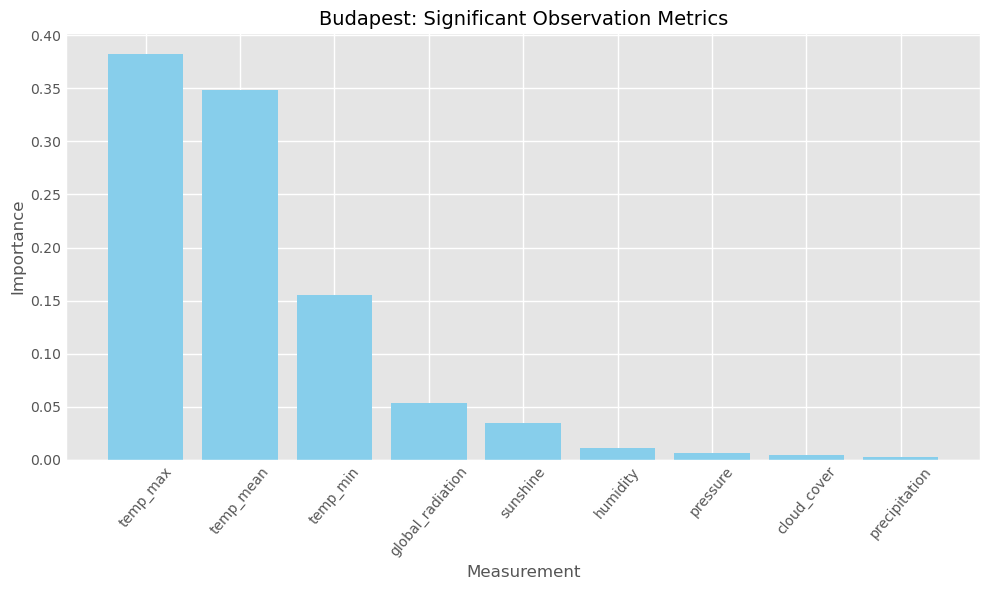

In [93]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_3['Measurement'], importances_df_3['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Budapest: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(path, 'Budapest_feauture_importances.png'), bbox_inches='tight')
plt.show()

In [94]:
# Filter weather dataset to only include Budapest
df_stock= climate_decade[climate_decade.columns[climate_decade.columns.astype(str).str.startswith('STOCKHOLM')]]

In [95]:
# Check output
df_stock.head(1)

STOCKHOLM_cloud_cover  STOCKHOLM_pressure  STOCKHOLM_global_radiation  \
18263                      6              1.0068                        0.12   

       STOCKHOLM_precipitation  STOCKHOLM_sunshine  STOCKHOLM_temp_mean  \
18263                     0.07                 1.5                 -7.6   

       STOCKHOLM_temp_min  STOCKHOLM_temp_max  
18263                -8.8                -7.0

In [108]:
# Filter pleasant dataset to only include STOCKHOLM
stock_pleasant = weather_decade[weather_decade.columns[weather_decade.columns.astype(str).str.startswith('STOCKHOLM')]]

# Check output
stock_pleasant.head(1)

STOCKHOLM_pleasant_weather
18263                           0

In [109]:
# Create matrices
y_4 = stock_pleasant.max(axis=1)

# Check shape
print("Shape of y_4_combined:", y_4.shape)

Shape of y_4_combined: (3652,)


In [110]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_4_combined:", y_4.unique())

Unique values in y_4_combined: [0 1]


In [111]:
# Ensure y has the correct shape
y_4 = y_4.to_numpy().reshape(-1)

# Check shape
print(y_4.shape)

(3652,)


In [112]:
# Create X matrix
X_4 = df_stock.to_numpy()

# Check shapes of the matrices
print(X_4.shape)
print(y_4.shape)

(3652, 8)
(3652,)


In [113]:
# Split data into training and testing sets
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, random_state=127)

# Check shapes
print(X_train_4.shape, y_train_4.shape)
print(X_test_4.shape, y_test_4.shape)

(2739, 8) (2739,)
(913, 8) (913,)


**Creating Random Forest for Stockholm**

In [114]:
# Creating a Random Forest classifier
clf_4 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_4.fit(X_train_4, y_train_4)

RandomForestClassifier(max_depth=3)

In [115]:
# Perform the predictions on the test dataset
y_pred_4 = clf_4.predict(X_test_4)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_4, y_pred_4))

Model Accuracy:  0.9879518072289156


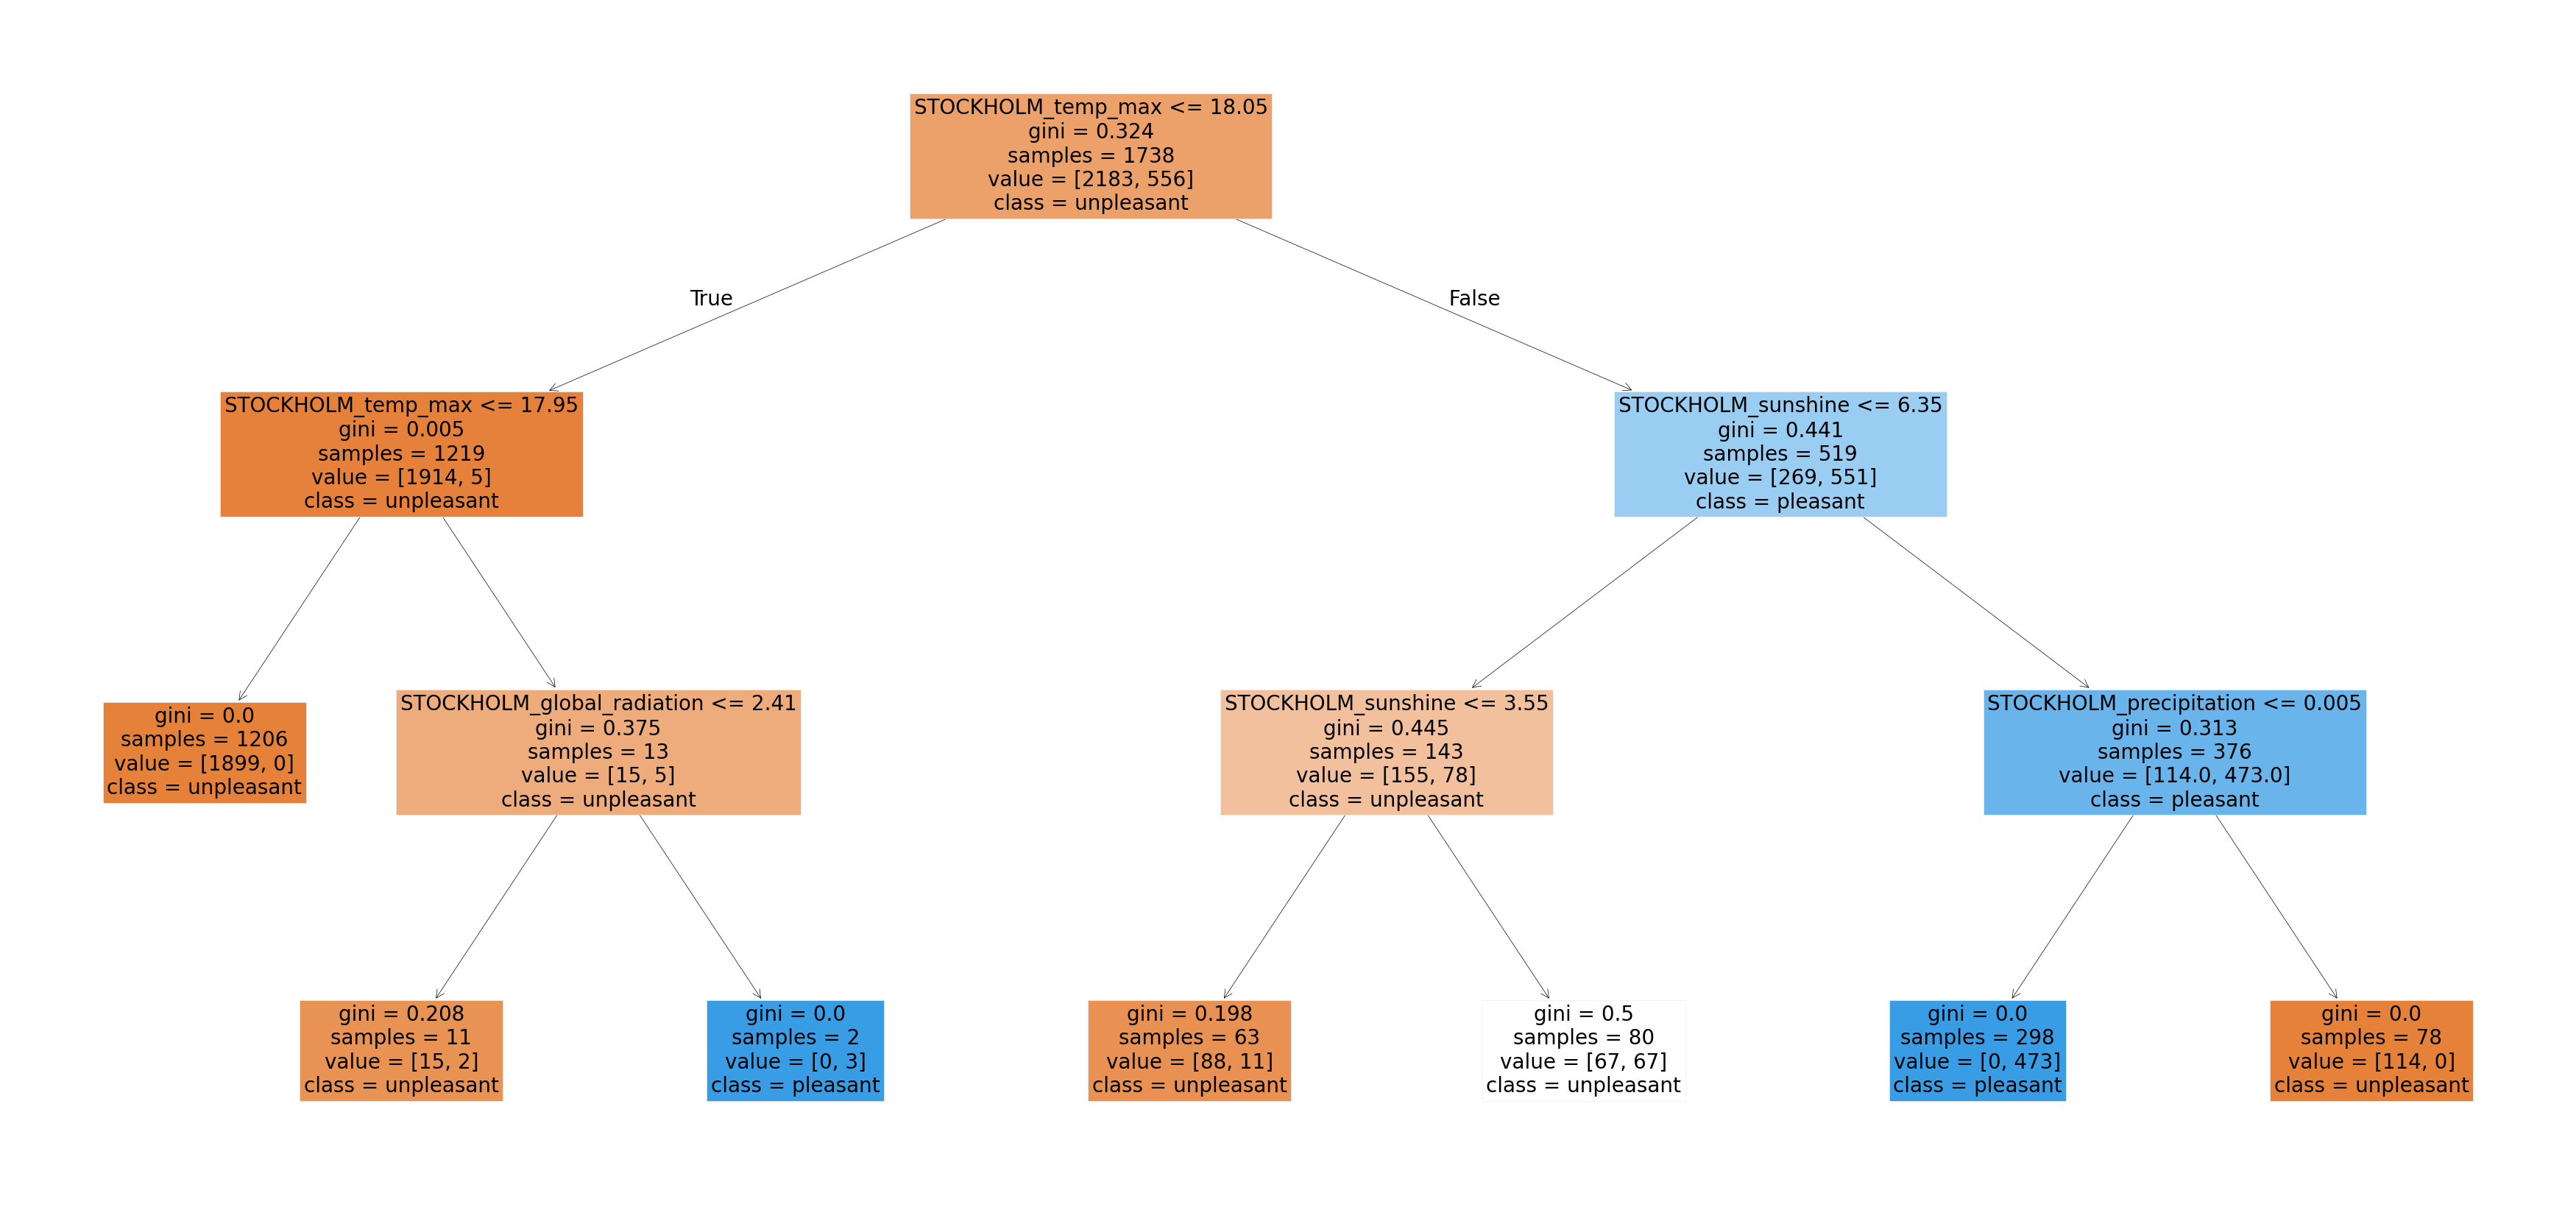

In [116]:
# Plot random forest (Budapest)
rf_4 = plt.figure(figsize=(40,20))
plot_tree(clf_4.estimators_[5], fontsize = 20, feature_names=df_stock.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [117]:
# Export the plot
rf_4.savefig(os.path.join(path, 'random_forest_stockholm.png'),bbox_inches='tight')

**Listing Feature Importances**

In [118]:
# Retrieve feature importances from the trained model
feature_importances_4 = clf_4.feature_importances_
print("Feature Importances:", feature_importances_4)
print(feature_importances_4.shape)

Feature Importances: [0.00308711 0.02056698 0.11869094 0.12491449 0.1031995  0.18548074
 0.11532253 0.32873771]
(8,)


In [121]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity',  'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [122]:
# Create a dataframe to associate observation measurements with their importances
importances_df_4 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_4
})

In [123]:
# Sort by importance for chart readability
importances_df_4 = importances_df_4.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_4)

Feature Importance:
        Measurement  Importance
7          temp_max    0.328738
5         temp_mean    0.185481
3     precipitation    0.124914
2  global_radiation    0.118691
6          temp_min    0.115323
4          sunshine    0.103200
1          humidity    0.020567
0       cloud_cover    0.003087


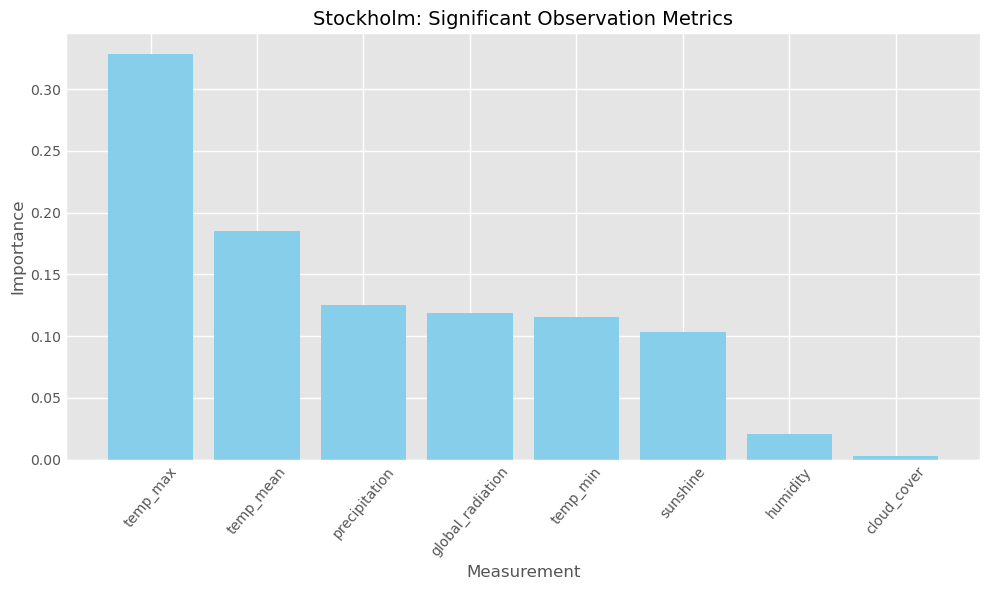

In [125]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_4['Measurement'], importances_df_4['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Stockholm: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(path, 'Stockholm_feauture_importances.png'), bbox_inches='tight')
plt.show()